# 积分

## 符号积分

积分与求导的关系

$$\frac{d}{dx} F(x) = f(x)
\Rightarrow F(x) = \int f(x) dx$$

符号运算可以用 `sympy` 模块完成

先导入 `init_printing` 模块方便其显示

In [11]:
from sympy import init_printing
init_printing()

In [12]:
from sympy import symbols, integrate
import sympy

产生x和y两个符号变量，并进行运算

In [13]:
x, y = symbols('x y')
sympy.sqrt(x ** 2 + y ** 2)

对于生成的符号变量z，我们将其中的x利用subs方法替换为3

In [14]:
z = sympy.sqrt(x ** 2 + y ** 2)
z.subs(x, 3)

再替换y

In [15]:
z.subs(x,3).subs(y,4)

还可以从sympy.abc中导入现成的符号变量

In [16]:
from sympy.abc import theta
y = sympy.sin(theta) ** 2
y

对y进行积分

In [17]:
Y = y.integrate(theta)
Y

计算Y($\pi$)-Y(0)

In [18]:
import numpy as np
np.set_printoptions(precision=3)

Y.subs(theta, np.pi) - Y.subs(theta, 0)

计算 $\int ^{\pi} _{0} yd\theta$

In [21]:
integrate(y, (theta, 0, sympy.pi))

显示的是字符表达式，查看具体数值可以使用`evalf()`方法，或传入`numpy.pi`，而不是`sympy.pi`

In [22]:
integrate(y, (theta, 0, np.pi))

In [23]:
integrate(y, (theta, 0, sympy.pi)).evalf()

根据牛顿-莱布尼茨公式，这两个数值应该相等

产生不定积分对象

In [24]:
Y_indef = sympy.Integral(y)
Y_indef

In [25]:
print(type(Y_indef))

<class 'sympy.integrals.integrals.Integral'>


定积分

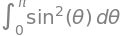

In [26]:
Y_def = sympy.Integral(y, (theta, 0, sympy.pi))
Y_def

产生函数 $Y(x)=\int_0^\pi sin^2(\theta)d\theta$ 并将其向量化

In [29]:
Y_raw = lambda x: integrate(y, (theta, 0, x))
Y = np.vectorize(Y_raw)
Y

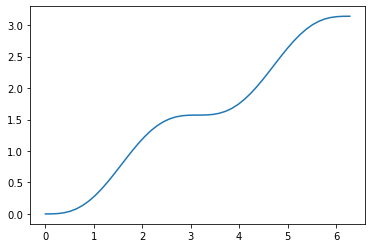

In [30]:
import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi)
p = plt.plot(x, Y(x))

## 数值积分

数值积分：

$$F(x) = \lim_{n \rightarrow \infty} \sum_{i=0}^{n-1} f(x_i)(x_{i+1}-x_i) 
\Rightarrow F(x) = \int_{x_0}^{x_n} f(x) dx$$

导入贝塞尔函数：

In [33]:
from scipy.special import jv

In [34]:
def f(x):
    return jv(2.5, x)

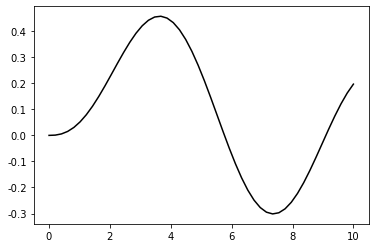

In [35]:
x = np.linspace(0, 10)
p = plt.plot(x, f(x), 'k-')

### `quad`函数

Quadrature 积分的原理参见：

http://en.wikipedia.org/wiki/Numerical_integration#Quadrature_rules_based_on_interpolating_functions

quad 返回一个 (积分值，误差) 组成的元组：

In [36]:
from scipy.integrate import quad
interval = [0, 6.5]
value, max_err = quad(f, *interval)

积分值

In [38]:
value

最大误差

In [39]:
max_err

积分区间图示，蓝色为正，红色为负

intergal = 1.28474297
upper bound on error: 2.34e-09


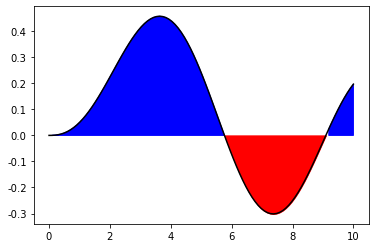

In [44]:
print('intergal = {:.9}'.format(value))
print('upper bound on error: {:.2e}'.format(max_err))
x = np.linspace(0, 10, 100)
p = plt.plot(x, f(x), 'k-')
p = plt.fill_between(x, f(x), where=f(x)>0, color='blue')
p = plt.fill_between(x, f(x), where=f(x)<0, color='red', interpolate=True)

### 积分到无穷

In [45]:
from numpy import Inf
interval = [0., Inf]
def g(x):
    return np.exp(-x ** 1/2)

upper bound on error: 7.2e-11


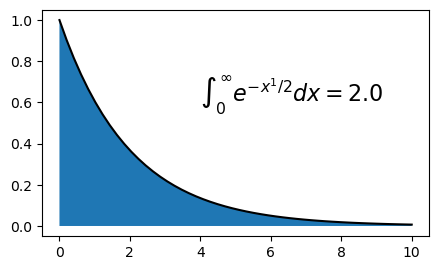

In [51]:
value, max_err = quad(g, *interval)
x = np.linspace(0, 10, 50)
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
ax.plot(x, g(x), 'k-')
ax.fill_between(x, g(x))
plt.annotate(r"$\int_0^{\infty}e^{-x^1/2}dx = $" + "{}".format(value), (4, 0.6),
         fontsize=16)
print("upper bound on error: {:.1e}".format(max_err))

### 双重积分

假设我们要进行如下的积分：

$$ I_n = \int \limits_0^{\infty} \int \limits_1^{\infty} \frac{e^{-xt}}{t^n}dt dx = \frac{1}{n}$$

In [52]:
def h(x, t, n):
    """core function, takes x, t, n"""
    return np.exp(-x * t) / (t ** n)

一种方式是调用两次 `quad` 函数，不过这里 `quad` 的返回值不能向量化，所以使用了修饰符 `vectorize` 将其向量化：

In [53]:
from numpy import vectorize
@vectorize
def int_h_dx(t, n):
    """Time integrand of h(x)."""
    return quad(h, 0, np.inf, args=(t, n))[0]

In [57]:
@vectorize
def I_n(n):
    return quad(int_h_dx, 1, np.inf, args=(n))

In [58]:
I_n([0.5, 1.0, 2.0, 5])

(array([2. , 1. , 0.5, 0.2]),
 array([4.507e-12, 4.340e-14, 5.551e-15, 2.220e-15]))

或者直接调用 `dblquad` 函数，并将积分参数传入，传入方式有多种，后传入的先进行积分：

In [59]:
from scipy.integrate import dblquad
@vectorize
def I(n):
    """Same as I_n, but using the built-in dblquad"""
    x_lower = 0
    x_upper = np.inf
    return dblquad(h, lambda t_lower: 1, lambda t_upper: np.inf, x_lower, x_upper, args=(n,))

In [60]:
I_n([0.5, 1.0, 2.0, 5])

(array([2. , 1. , 0.5, 0.2]),
 array([4.507e-12, 4.340e-14, 5.551e-15, 2.220e-15]))

## 采样点积分

### `trapz` 方法 `simps` 方法

In [62]:
from scipy.integrate import trapz, simps

`sin`函数，100个采样点和5个采样点

In [63]:
x_s = np.linspace(0, np.pi, 5)
y_s = np.sin(x_s)
x = np.linspace(0, np.pi, 100)
y = np.sin(x)

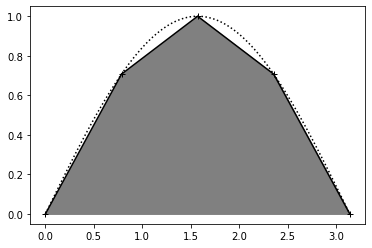

In [67]:
p = plt.plot(x, y, 'k:')
p = plt.plot(x_s, y_s, 'k+-')
p = plt.fill_between(x_s, y_s, color='gray')

采用 [trapezoidal 方法](https://en.wikipedia.org/wiki/Trapezoidal_rule) 和 [simpson 方法](https://en.wikipedia.org/wiki/Simpson%27s_rule) 对这些采样点进行积分（函数积分为 2）：

In [71]:
result_s = trapz(y_s, x_s)
result_s_s = simps(y_s, x_s)
result = trapz(y, x)
print("Trapezoidal Integration over 5 points : {:.3f}".format(result_s))
print("Simpson Integration over 5 points : {:.3f}".format(result_s_s))
print("Trapezoidal Integration over 100 points : {:.3f}".format(result))

Trapezoidal Integration over 5 points : 1.896
Simpson Integration over 5 points : 2.005
Trapezoidal Integration over 100 points : 2.000


使用ufunc进行积分

Numpy中有很多ufunc对象

In [72]:
type(np.add)

numpy.ufunc

In [73]:
np.info(np.add.accumulate)

accumulate(array, axis=0, dtype=None, out=None)

Accumulate the result of applying the operator to all elements.

For a one-dimensional array, accumulate produces results equivalent to::

  r = np.empty(len(A))
  t = op.identity        # op = the ufunc being applied to A's  elements
  for i in range(len(A)):
      t = op(t, A[i])
      r[i] = t
  return r

For example, add.accumulate() is equivalent to np.cumsum().

For a multi-dimensional array, accumulate is applied along only one
axis (axis zero by default; see Examples below) so repeated use is
necessary if one wants to accumulate over multiple axes.

Parameters
----------
array : array_like
    The array to act on.
axis : int, optional
    The axis along which to apply the accumulation; default is zero.
dtype : data-type code, optional
    The data-type used to represent the intermediate results. Defaults
    to the data-type of the output array if such is provided, or the
    the data-type of the input array if no output array is

np.add.accumulate相当于cumsum

In [74]:
result_np = np.add.accumulate(y) * (x[1] - x[0]) - (x[1] - x[0]) / 2

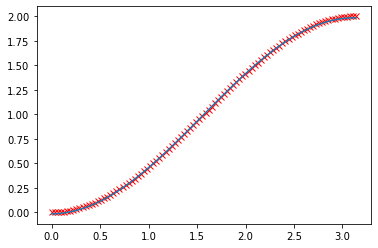

In [76]:
p = plt.plot(x, -np.cos(x) + np.cos(0), 'rx')
p = plt.plot(x, result_np)

### 速度比较

计算积分：$$\int_0^x sin \theta d\theta$$

In [80]:
import sympy
from sympy.abc import x, theta
sympy_x = x

In [81]:
x = np.linspace(0, 20 * np.pi, 1e+4)
y = np.sin(x)
sympy_y = vectorize(lambda x: sympy.integrate(sympy.sin(theta), (theta, 0, x)))

TypeError: 'float' object cannot be interpreted as an integer